In [17]:
# Libraries for data and model handling
import numpy as np
import pandas as pd

# Load built-in digits dataset
from sklearn.datasets import load_digits

# Preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
# Load the digits dataset (each sample is an 8x8 image of a digit)
digits = load_digits()
X = digits.data        # Flattened image data (1797 samples, 64 features)
y = digits.target      # Corresponding digit labels (0 to 9)

# Check shape of dataset
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (1797, 64)
Target vector shape: (1797,)


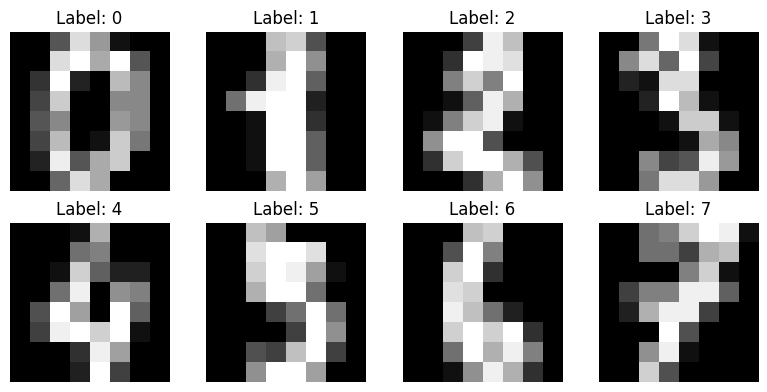

In [19]:
# Plot 8 sample images from the dataset
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')   # Use 2D image format
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_knn_pred = knn_model.predict(X_test_scaled)


In [22]:
# Initialize and train the SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_svm_pred = svm_model.predict(X_test_scaled)


In [23]:
# Define a helper function for evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📌 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate KNN and SVM
evaluate_model(y_test, y_knn_pred, "KNN")
evaluate_model(y_test, y_svm_pred, "SVM")



📌 KNN Evaluation:
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360


📌 SVM Evaluation:
Accuracy: 0.9805555555555555
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
 

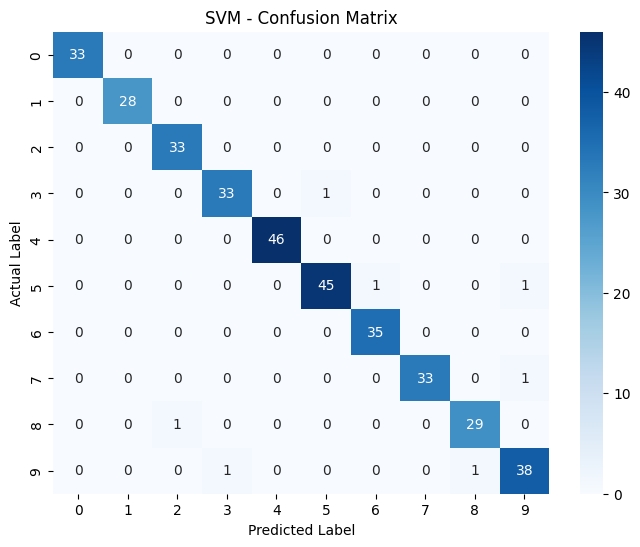

In [24]:
# Plot confusion matrix for SVM predictions
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_svm_pred), annot=True, cmap="Blues", fmt="d")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
